## Task: Image Classification using pretrained ResNet50 Model

### Step 1: Import Libraries

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from keras.preprocessing.image import image
from keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import img_to_array
from keras.applications.resnet50 import preprocess_input
from keras.applications.imagenet_utils import decode_predictions

### Step 2: Import DataSet

In [7]:
!curl -O https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz
#http://sds-datacrunch.aau.dk/public/dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 94.3M  100 94.3M    0     0  16.2M      0  0:00:05  0:00:05 --:--:-- 22.8M


In [8]:
!tar xvzf imagenette2-160.tgz
#!unzip -qq dataset.zip

imagenette2-160/
imagenette2-160/train/
imagenette2-160/train/n03425413/
imagenette2-160/train/n03425413/n03425413_20558.JPEG
imagenette2-160/train/n03425413/n03425413_21513.JPEG
imagenette2-160/train/n03425413/n03425413_29828.JPEG
imagenette2-160/train/n03425413/n03425413_21285.JPEG
imagenette2-160/train/n03425413/n03425413_10789.JPEG
imagenette2-160/train/n03425413/n03425413_403.JPEG
imagenette2-160/train/n03425413/n03425413_4855.JPEG
imagenette2-160/train/n03425413/n03425413_21763.JPEG
imagenette2-160/train/n03425413/n03425413_21315.JPEG
imagenette2-160/train/n03425413/n03425413_21714.JPEG
imagenette2-160/train/n03425413/n03425413_1207.JPEG
imagenette2-160/train/n03425413/n03425413_5716.JPEG
imagenette2-160/train/n03425413/n03425413_16417.JPEG
imagenette2-160/train/n03425413/n03425413_1834.JPEG
imagenette2-160/train/n03425413/n03425413_17079.JPEG
imagenette2-160/train/n03425413/n03425413_28327.JPEG
imagenette2-160/train/n03425413/n03425413_15496.JPEG
imagenette2-160/train/n03425413/

In [9]:
!ls

imagenette2-160  imagenette2-160.tgz


In [10]:
!ls imagenette2-160/

train  val


### Step 3: Preprocess Input Image to load into ResNet50 model

In [11]:
original = image.load_img('imagenette2-160/train/n03425413/n03425413_20558.JPEG', target_size=(224, 224))

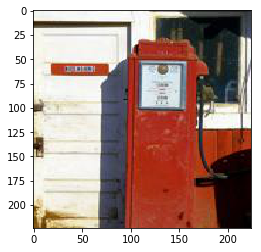

In [14]:
plt.imshow(original)

In [15]:
original = image.img_to_array(original)

In [16]:
original = np.expand_dims(original,axis=0)

In [17]:
original = preprocess_input(original)

### Step 4: Load ResNet50 model in Keras

In [18]:
pretrained_model = ResNet50(weights='imagenet',include_top=True)

In [19]:
prediction = pretrained_model.predict(original)

### Predicted Label

In [22]:
print('Predicted:', decode_predictions(prediction, top=1)[0])

40960/35363 [==================================] - 0s 4us/step
Predicted: [('n03425413', 'gas_pump', 0.99424213)]


In [23]:
print('Predicted:', decode_predictions(prediction, top=5)[0])

Predicted: [('n03425413', 'gas_pump', 0.99424213), ('n04141975', 'scale', 0.0031253693), ('n03902125', 'pay-phone', 0.00039602167), ('n03710193', 'mailbox', 0.0003475283), ('n04525305', 'vending_machine', 0.0002649012)]


### Now let's run for all images in the validation directory

In [27]:
img_folder = 'imagenette2-160/val/n03000684/'

In [ ]:
import os
import os.path
for i in os.listdir(img_folder):
        scriptpath = os.path.dirname(i)
        print(os.path.join(scriptpath, i))
        original = image.load_img(img_folder + os.path.join(scriptpath, i), target_size=(224, 224))
        original = image.img_to_array(original)
        original = np.expand_dims(original,axis=0)
        original = preprocess_input(original)
        prediction = pretrained_model.predict(original)
        print('Predicted:', decode_predictions(prediction, top=1)[0])

n03000684_16991.JPEG
Predicted: [('n03000684', 'chain_saw', 0.9120454)]
n03000684_6881.JPEG
Predicted: [('n03792782', 'mountain_bike', 0.2350907)]
n03000684_8071.JPEG
Predicted: [('n03000684', 'chain_saw', 0.99999774)]
n03000684_28711.JPEG
Predicted: [('n03000684', 'chain_saw', 0.99998796)]
ILSVRC2012_val_00029211.JPEG
Predicted: [('n03000684', 'chain_saw', 1.0)]
n03000684_17182.JPEG
Predicted: [('n03976657', 'pole', 0.3193422)]
n03000684_711.JPEG
Predicted: [('n03000684', 'chain_saw', 1.0)]
n03000684_2972.JPEG
Predicted: [('n03000684', 'chain_saw', 0.43344846)]
n03000684_15932.JPEG
Predicted: [('n03976657', 'pole', 0.3878945)]
n03000684_31790.JPEG
Predicted: [('n03000684', 'chain_saw', 0.3125833)]
n03000684_7012.JPEG
Predicted: [('n03000684', 'chain_saw', 0.9992393)]
n03000684_4012.JPEG
Predicted: [('n03000684', 'chain_saw', 0.9266589)]
n03000684_19792.JPEG
Predicted: [('n03697007', 'lumbermill', 0.5704249)]
n03000684_17330.JPEG
Predicted: [('n03000684', 'chain_saw', 0.9932706)]
n0300